##  Data analysis task
This is an analysis of one-week data exported from an event loggging system. The task description and the dataset is available [here](https://github.com/wikimedia-research/Discovery-Hiring-Analyst-2016). 
<h></h>
Executive summary:
* The most frequent action is checkin.
* The **activity decreased for the weekend** by two percent in case of all actions.
* People actually clicking on the search results (Click Through Rate, CTR) is the least frequent action out of the three actions.
* People tended to click on these results more – ie CTR was higher – at the beginning of the week.
* **There are differences between members of group A and group B.** Members of group A were more active in clicking on the results – ie their CTR was proportionately higher compared to group B.
* Regarding all actions, not only clicking on the results, the number of actions taken by group A and group B seems to change reciprocially. When there is a decrease in the activity of group A, there is an increase of group B; and where there is an increase in the activity of group A, there is a decrease in that of group B.
* The proportion of searches that returned no results, ie the zero results rate was highest on March 8 and lowest on March 6.
* There is a difference between group A and group B when it comes to the zero results rate too: for March 5 Group B's zero results rate was increasing, while for of group A the same rate was decreasing. Nevertheless, for March 8 both of them were increasing.
* Probably there is an error in the database or **bots were on the site** hinted by the fact that someone was checking the 3895<sup>th</sup> result and also that in the third of the cases merely ten seconds passed by between two actions – as if it was a sleeping pattern of a script.
* When it comes to session lenghts, there are no major differences between group A and group B.

This notebook was created by using Python 3.6.1 :: Anaconda custom (64-bit); Conda version : 4.3.25.

In [1]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
data = pd.read_csv("events_log.csv", sep = ",", encoding = "utf-8")

In [3]:
# check for duplicate rows
data1 = data.drop_duplicates()
len(data) == len(data1)

True

In [4]:
data['timestamp'] = data['timestamp'].apply(lambda x: int(x))
data["date"] = data["timestamp"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d%H%M%S"))
data["date2"] = data["date"] # so data["date"] can be index
data["day"] = data["date2"].apply(lambda x: x.strftime('%Y-%m-%d'))

## 1a) What is the daily overall clickthrough rate?

In [5]:
df = data.set_index("date")
action_by_day = df.groupby(['day', 'action']).size().reset_index()
action_by_day.rename(columns={0: 'count'}, inplace=True)
action_by_day_pivot = action_by_day.pivot(index='day', columns='action', values='count').reset_index()
action_by_day_pivot["total_action"] = action_by_day_pivot["checkin"] + action_by_day_pivot["searchResultPage"] + \
    action_by_day_pivot["visitPage"]
action_by_day_pivot["CTR"] = action_by_day_pivot["visitPage"] / action_by_day_pivot["total_action"] * 100

/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


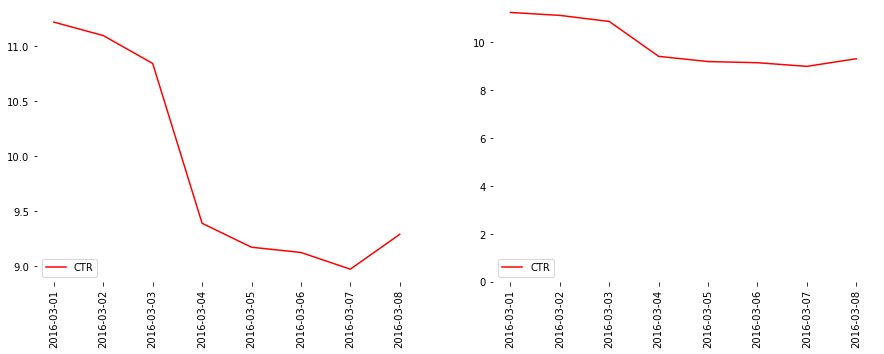

In [6]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

ax = action_by_day_pivot.plot(x="day", y="CTR", kind="line", color = "red", ax = axs[0])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['CTR'], loc='lower left')

ax = action_by_day_pivot.plot(x="day", y="CTR", kind="line", color = "red", ax = axs[1])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.set_ylim(ymin=0) # providing both plots to highlight differences and also showing the big picture
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['CTR'], loc='lower left')
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90);

## 1b) – How does CTR vary between the groups?

In [7]:
action_by_day_by_group = df.groupby(['day', 'group', 'action']).size().reset_index()
action_by_day_by_group.rename(columns={0: 'count'}, inplace=True)

#separating the two groups
A_action_by_day_by_group = action_by_day_by_group[action_by_day_by_group.group == "a"]
B_action_by_day_by_group = action_by_day_by_group[action_by_day_by_group.group == "b"]

In [8]:
A_action_by_day_by_group_pivot = A_action_by_day_by_group.pivot(index='day', columns= 'action', values='count').reset_index()
A_action_by_day_by_group_pivot["total_action"] = A_action_by_day_by_group_pivot["checkin"] + A_action_by_day_by_group_pivot["searchResultPage"] + \
    A_action_by_day_by_group_pivot["visitPage"]
A_action_by_day_by_group_pivot["CTR"] = A_action_by_day_by_group_pivot["visitPage"] / A_action_by_day_by_group_pivot["total_action"] * 100


B_action_by_day_by_group_pivot = B_action_by_day_by_group.pivot(index='day', columns= 'action', values='count').reset_index()
B_action_by_day_by_group_pivot["total_action"] = B_action_by_day_by_group_pivot["checkin"] + B_action_by_day_by_group_pivot["searchResultPage"] + \
    B_action_by_day_by_group_pivot["visitPage"]
B_action_by_day_by_group_pivot["CTR"] = B_action_by_day_by_group_pivot["visitPage"] / B_action_by_day_by_group_pivot["total_action"] * 100


merged_groups = pd.merge(A_action_by_day_by_group_pivot, B_action_by_day_by_group_pivot, left_on = "day", right_on = "day")

/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


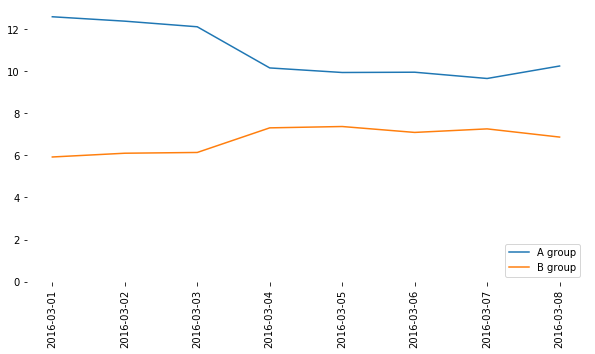

In [9]:
ax = merged_groups.plot(x="day", y="CTR_x", kind="line")
merged_groups.plot(x="day", y="CTR_y", kind="line", ax=ax, figsize=(10,5))
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.set_ylim(ymin=0)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['A group', 'B group'], loc='lower right');

## 2) Which actions do people tend to try first? How does it change day-to-day?

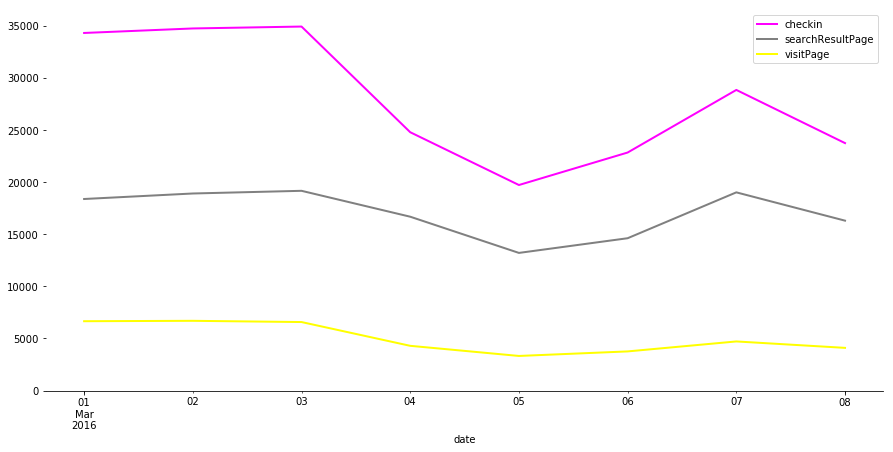

In [10]:
fig, ax = subplots()
data.groupby([pd.Grouper(key='date', freq='D'), 'action']).size().unstack().plot(figsize=(15,7), \
     color = ['magenta', 'grey', 'yellow'], linewidth = 2, ax = ax)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(ymin=0)
ax.legend(loc='upper right');

## 3a) What is the daily overall zero results rate? 

In [11]:
search = df[df.action == "searchResultPage"]
len(search.loc[pd.isnull(search.n_results)]) # check for NaN

0

In [12]:
search_0 = search[search.n_results == 0]
search_0_byday = search_0.groupby(by=["day", "session_id", "group"]).size().reset_index()
search_0_byday.rename(columns={0: 'count'}, inplace=True)

search_not_0 = search[search.n_results != 0]
search_not_0_byday = search_not_0.groupby(by=["day", "session_id", "group"]).size().reset_index()
search_not_0_byday.rename(columns={0: 'count'}, inplace=True)

In [13]:
search_not_0_byday_grouped = search_not_0_byday.groupby(by = ["day"])["count"].sum().reset_index()
search_0_byday_grouped = search_0_byday.groupby(by = ["day"])["count"].sum().reset_index()

search_merged = pd.merge(search_0_byday_grouped, search_not_0_byday_grouped, left_on = "day" , right_on = "day")
search_merged.rename(columns={"count_x" : "zero_results", "count_y" : "non-zero_results"}, inplace = True)

search_merged["total"] = search_merged["zero_results"] + search_merged["non-zero_results"]
search_merged["zero_results_rate"] = search_merged["zero_results"] / search_merged["total"] * 100

/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


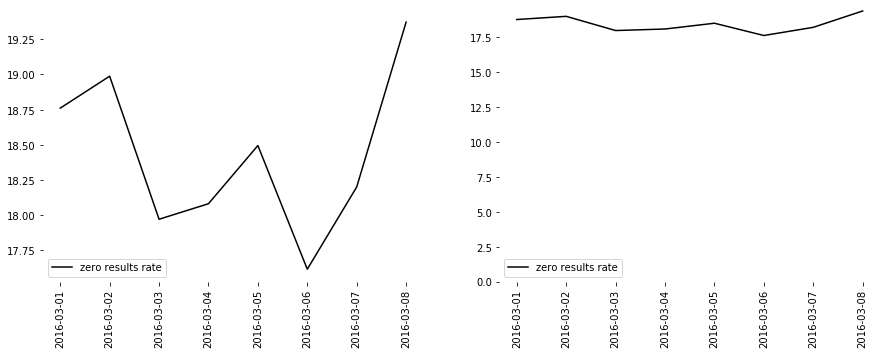

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

ax = search_merged.plot(x="day", y="zero_results_rate", kind="line", color = "black", ax=axs[0])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['zero results rate'], loc='lower left')

ax = search_merged.plot(x="day", y="zero_results_rate", kind="line", color = "black", ax=axs[1])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.set_ylim(ymin=0)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['zero results rate'], loc='lower left')
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90);

## 3b) How does the zero results rate vary between the groups?

In [16]:
search_not_0_byday_grouped = search_not_0_byday.groupby(by=["day", "group"])["count"].sum().reset_index()
search_0_byday_grouped = search_0_byday.groupby(by=["day", "group"])["count"].sum().reset_index()

search_group_merged = pd.merge(search_0_byday_grouped, search_not_0_byday_grouped, on=['day', 'group'])
search_group_merged.rename(columns={"count_x":"zero_results", "count_y" : "non-zero_results"}, inplace = True)
search_group_merged["total"] = search_group_merged["zero_results"] + search_group_merged["non-zero_results"]
search_group_merged["zero_results_rate"] = search_group_merged["zero_results"] / search_group_merged["total"] * 100

search_group_merged_a = search_group_merged[search_group_merged.group == "a"]
search_group_merged_b = search_group_merged[search_group_merged.group == "b"]
search_group_merged_a.rename(columns={"zero_results_rate" : "a_group"}, inplace = True)
search_group_merged_b.rename(columns={"zero_results_rate": "b_group"}, inplace = True)
search_groups_merged_again= pd.merge(search_group_merged_a, search_group_merged_b, on = "day")

/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


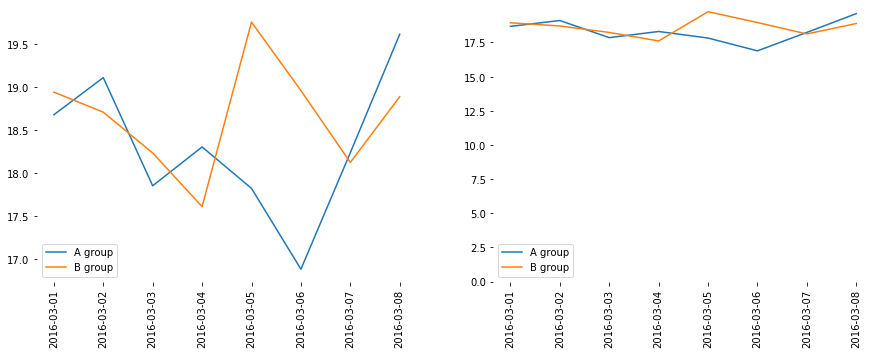

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

ax = search_groups_merged_again.plot(x="day", y="a_group", kind="line", ax = axs[0])
search_groups_merged_again.plot(x="day", y="b_group", kind="line", ax=axs[0])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['A group', 'B group'], loc='lower left')

ax = search_groups_merged_again.plot(x="day", y="a_group", kind="line", ax = axs[1])
search_groups_merged_again.plot(x="day", y="b_group", kind="line", ax=axs[1])
plt.xticks(rotation='vertical')
ax.set_xlabel('')
ax.set_ylim(ymin=0)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(['A group', 'B group'], loc='lower left')
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90);

## 4) session length

In [18]:
# calculate delta
df_sorted = df.sort_values(["session_id", "date2"])
df_sorted['delta'] = df_sorted.groupby('session_id')['date2'].diff()

# convert delta to seconds
df_sorted["delta_seconds"] = df_sorted["delta"].dt.total_seconds()

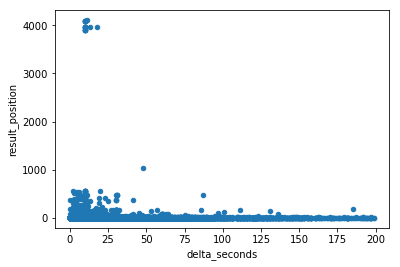

In [19]:
df_sorted.loc[df_sorted.delta_seconds < 200].plot.scatter('delta_seconds', 'result_position');

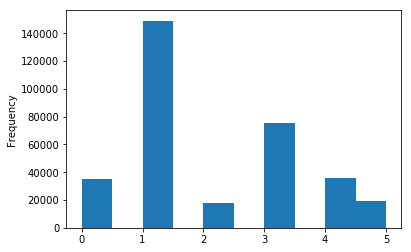

In [20]:
df_sorted['delta_decile'] = pd.qcut(df_sorted['delta_seconds'], 10, labels=False, duplicates = "drop")
df_sorted['delta_decile'].plot(kind='hist');

In [22]:
# probably it is a mistake or bots were wisiting the site, or who picks the 3895th result?
df_sorted.loc[(df_sorted["result_position"] > 1000)]

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,date2,day,delta,delta_seconds,delta_decile
date,,,,,,,,,,,,,,
2016-03-06 08:50:34,77520ab2ea325ad48b97867f921ba609,20160306085034,5947cae98d37b6dd,a,visitPage,NaN,4cc2444b7c00d406,NaN,1044.0,2016-03-06 08:50:34,2016-03-06,00:00:48,48.0,4.0
2016-03-01 17:46:16,bbf03ae8545f5e1288619ce24c59ad9a,20160301174616,5e0036c1b3bcd196,a,visitPage,NaN,f42fae5dbf9c2922,NaN,3895.0,2016-03-01 17:46:16,2016-03-01,00:00:10,10.0,1.0
2016-03-01 17:46:26,74fc7080d9ec5be4b7ca0c752ab9540b,20160301174626,5e0036c1b3bcd196,a,checkin,10.0,f42fae5dbf9c2922,NaN,3895.0,2016-03-01 17:46:26,2016-03-01,00:00:10,10.0,1.0
2016-03-01 17:46:36,5a2974bdcc0a534482872cdf7ac99717,20160301174636,5e0036c1b3bcd196,a,checkin,20.0,f42fae5dbf9c2922,NaN,3895.0,2016-03-01 17:46:36,2016-03-01,00:00:10,10.0,1.0
2016-03-01 17:46:46,6f593178b0505fbb92725e9d0125753c,20160301174646,5e0036c1b3bcd196,a,checkin,30.0,f42fae5dbf9c2922,NaN,3895.0,2016-03-01 17:46:46,2016-03-01,00:00:10,10.0,1.0
2016-03-01 17:46:56,2317c9db38dd52c7a7badc824b7fe1e4,20160301174656,5e0036c1b3bcd196,a,checkin,40.0,f42fae5dbf9c2922,NaN,3895.0,2016-03-01 17:46:56,2016-03-01,00:00:10,10.0,1.0
2016-03-01 17:48:03,e545283cb5775a9da827886e8d9acb8f,20160301174803,5e0036c1b3bcd196,a,visitPage,NaN,2c910c78fbc6fd09,NaN,3955.0,2016-03-01 17:48:03,2016-03-01,00:00:18,18.0,3.0
2016-03-01 17:48:27,570ffbc22bfd5377966e88bf6443f270,20160301174827,5e0036c1b3bcd196,a,visitPage,NaN,4936788d061bba51,NaN,3972.0,2016-03-01 17:48:27,2016-03-01,00:00:13,13.0,2.0
2016-03-01 17:48:37,1dd5f5318d72535c9465c323771135a5,20160301174837,5e0036c1b3bcd196,a,checkin,10.0,4936788d061bba51,NaN,3972.0,2016-03-01 17:48:37,2016-03-01,00:00:10,10.0,1.0


In [23]:
df_sorted["delta_seconds"].describe()

count    332137.000000
mean         31.446247
std         646.523523
min           0.000000
25%          10.000000
50%          10.000000
75%          30.000000
max      239924.000000
Name: delta_seconds, dtype: float64

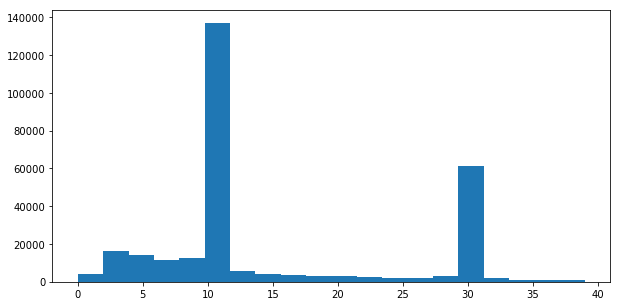

In [24]:
df_sorted.loc[(df_sorted["delta_seconds"] < 40)]["delta_seconds"].hist(bins=20, grid = False, figsize = (10, 5));

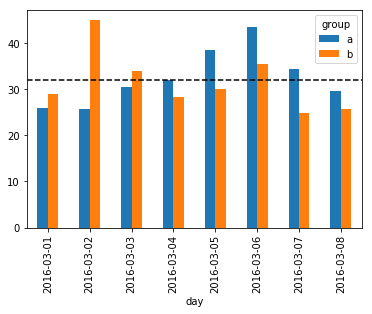

In [40]:
df_sorted_group_seconds = df_sorted.groupby(by=["day", "group"])["delta_seconds"].mean().reset_index()

df_sorted_group_seconds.pivot(index='day', columns='group', values='delta_seconds').plot(kind='bar')

plt.axhline(df_sorted_group_seconds["delta_seconds"].mean(), color = "black", linestyle="dashed");

In [41]:
df_sorted.groupby(["action", "group"])["n_results", "result_position", "delta_seconds"].mean().reset_index()

,action,group,n_results,result_position,delta_seconds
0,checkin,a,NaN,3.108520,25.780375
1,checkin,b,NaN,1.934195,31.420407
2,searchResultPage,a,13.436984,NaN,57.057092
3,searchResultPage,b,12.737358,NaN,52.260131
4,visitPage,a,NaN,4.547751,13.114761
5,visitPage,b,NaN,1.971154,12.665782
